### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Se usara esto para dar un estilo visual
plt.style.use("ggplot")
sns.set_theme()

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Identificación de cada tienda
tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

# Unificacion de los datos en un solo DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [4]:
# Facturacion por Tienda
df["facturación"] = df["Precio"] + df["Costo de envío"]

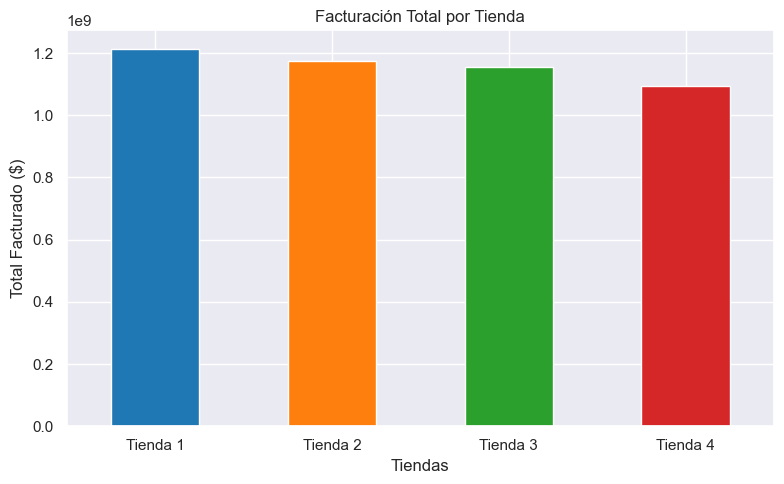

In [15]:
facturacion_por_tienda = df.groupby("tienda")["facturación"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
colores = cm.tab10(range(len(facturacion_por_tienda)))
facturacion_por_tienda.plot(kind='bar', color=colores, figsize=(8,5))
plt.title("Facturación Total por Tienda")
plt.ylabel("Total Facturado ($)")
plt.xlabel("Tiendas")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [21]:
# Ventas por categoria
ventas_por_categoria = (
    df["Categoría del Producto"]
    .value_counts()
    .sort_values(ascending=False)
)

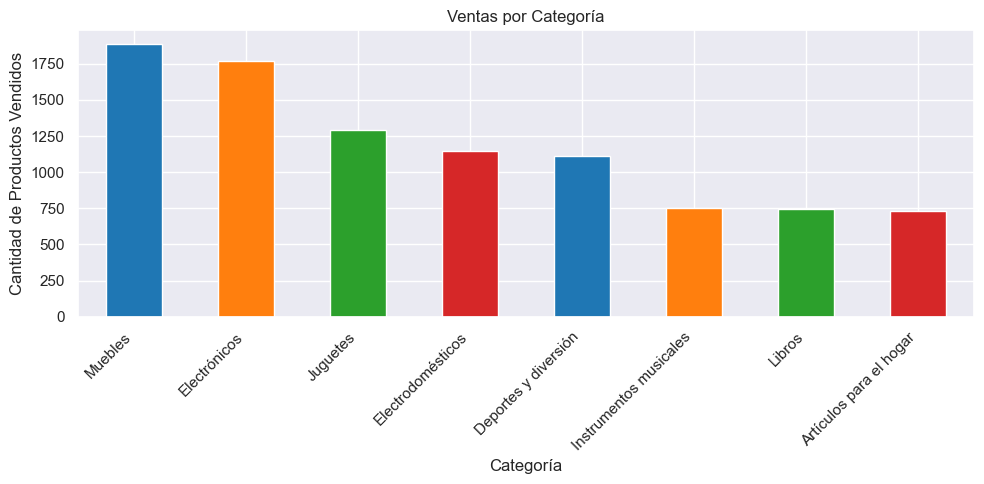

In [25]:
plt.figure(figsize=(10, 5))
ventas_por_categoria.plot(kind='bar', color=colores, figsize=(10,5))
plt.title("Ventas por Categoría")
plt.ylabel("Cantidad de Productos Vendidos")
plt.xlabel("Categoría")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

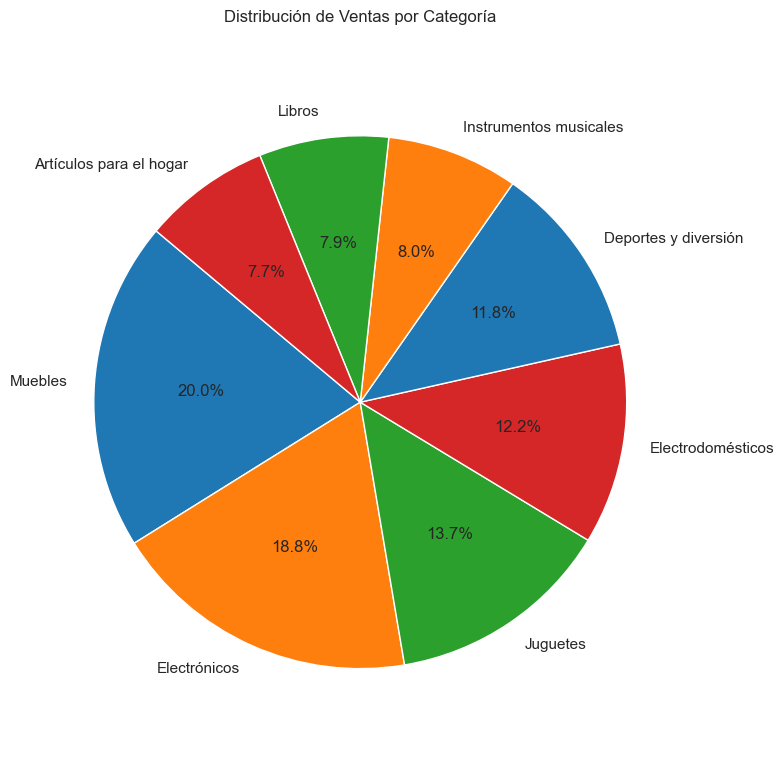

In [26]:
# Grafico circular de ventas por categoria
plt.figure(figsize=(8, 8))
ventas_por_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Distribución de Ventas por Categoría")
plt.ylabel("")  
plt.axis('equal')  
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [28]:
# Calificación promedio por tienda
calificacion_promedio = df.groupby("tienda")["Calificación"].mean().sort_values(ascending=False)


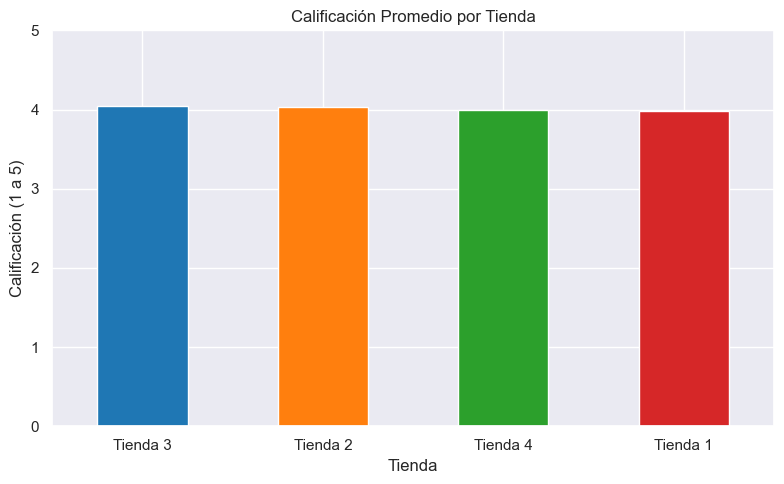

In [34]:
# Gráfica
plt.figure(figsize=(8, 5))
sns.set_palette("husl")  # Cambia la paleta de colores
calificacion_promedio.plot(kind="bar", color=colores, figsize=(8,5))
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación (1 a 5)")
plt.xlabel("Tienda")
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

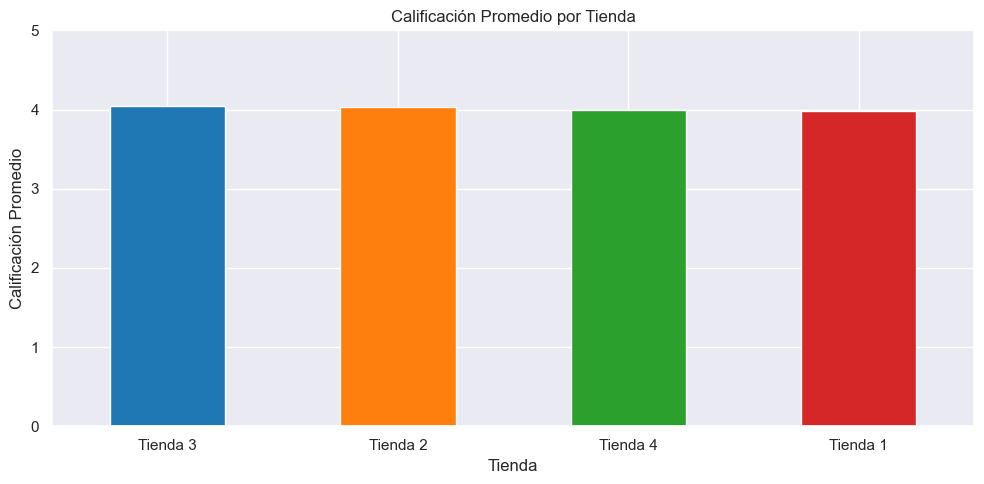

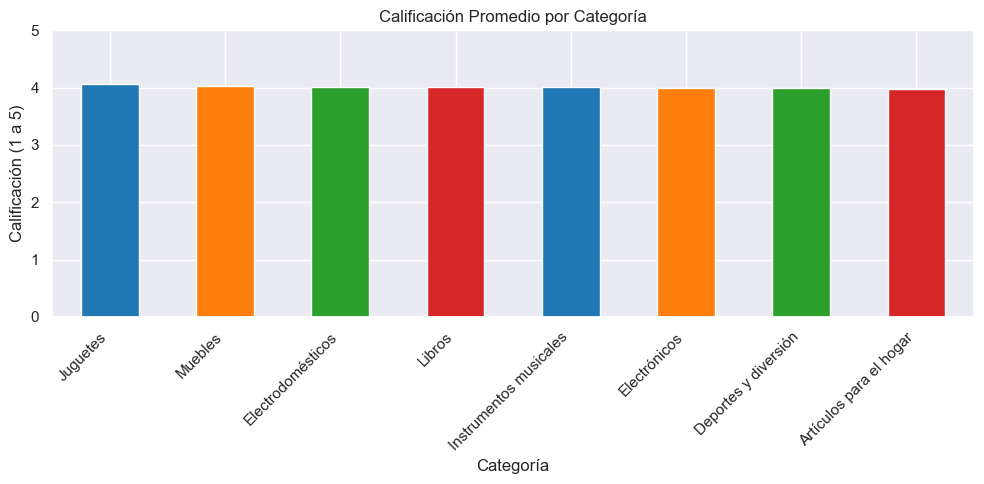

In [39]:
# Grafico de barras vertical de calificaciones
plt.figure(figsize=(10, 5))
calificacion_promedio.plot(kind='bar', color=colores, figsize=(10,5))
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación Promedio")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.ylim(0, 5)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
# Calificación promedio por categoría
calificacion_por_categoria = df.groupby("Categoría del Producto")["Calificación"].mean().sort_values(ascending=False)
# Gráfica
plt.figure(figsize=(10, 5))
calificacion_por_categoria.plot(kind="bar", color=colores, figsize=(10,5))  
plt.title("Calificación Promedio por Categoría")
plt.ylabel("Calificación (1 a 5)")
plt.xlabel("Categoría")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 5)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

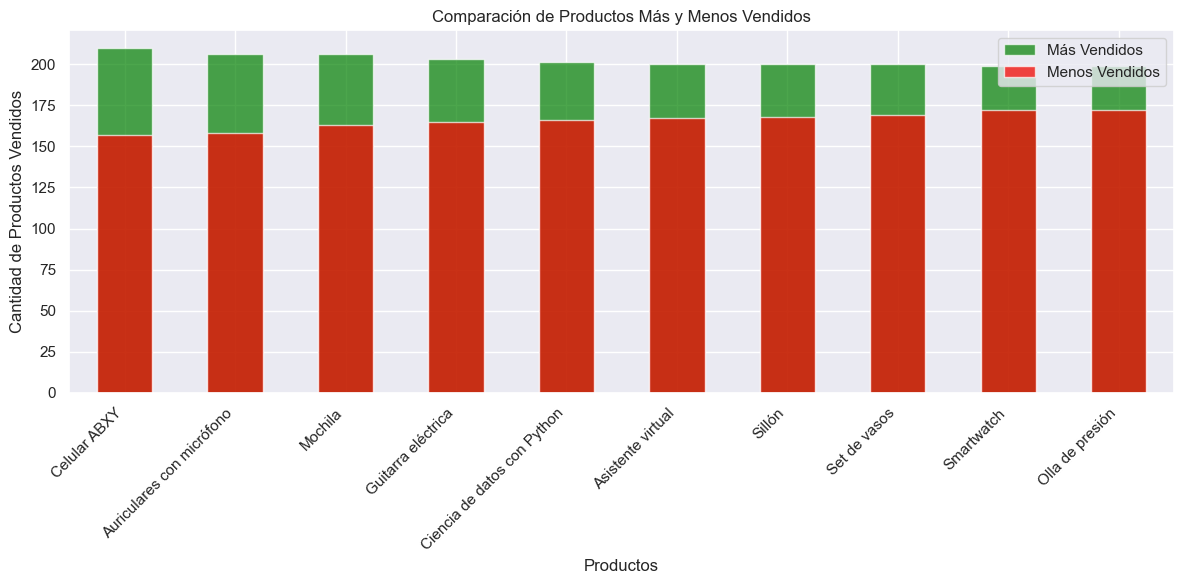

In [41]:
# Productos mas vendidos
productos_mas_vendidos = (
    df["Producto"]
    .value_counts()
    .head(10)
)

# Productos menos vendidos
productos_menos_vendidos = (
    df["Producto"]
    .value_counts(ascending=True)
    .head(10)

)



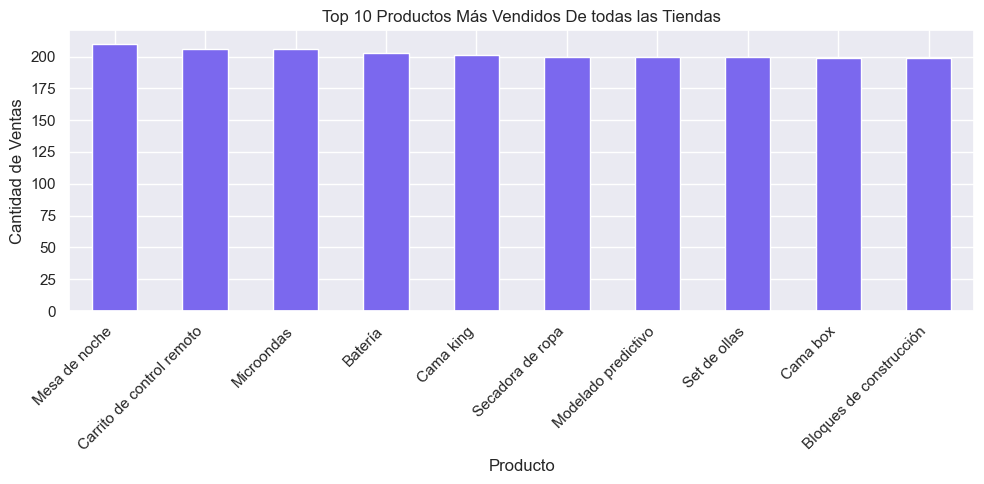

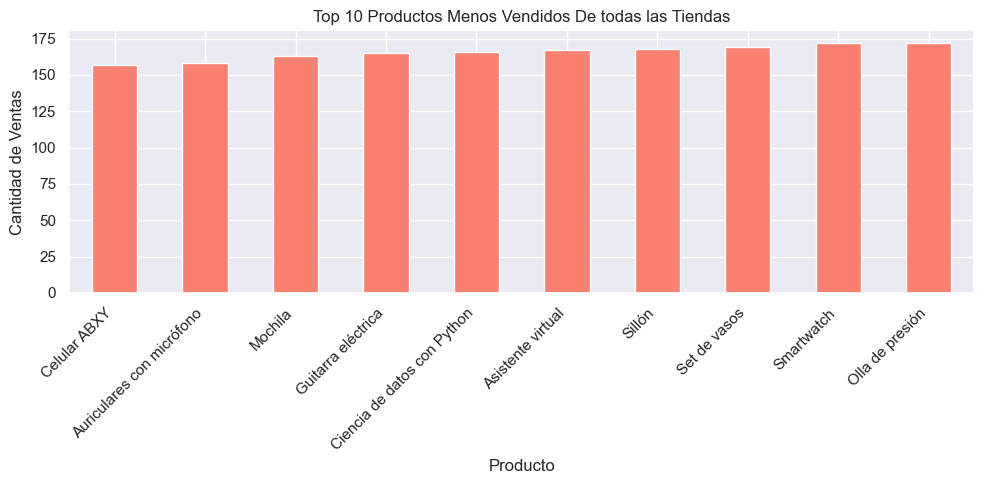

In [42]:
# Grafica productos mas vendidos
plt.figure(figsize=(10, 5))
productos_mas_vendidos.plot(kind="bar", color="mediumslateblue")
plt.title("Top 10 Productos Más Vendidos De todas las Tiendas")
plt.ylabel("Cantidad de Ventas")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Grafica productos menos vendidos
plt.figure(figsize=(10, 5))
productos_menos_vendidos.plot(kind="bar", color="salmon")
plt.title("Top 10 Productos Menos Vendidos De todas las Tiendas")
plt.ylabel("Cantidad de Ventas")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

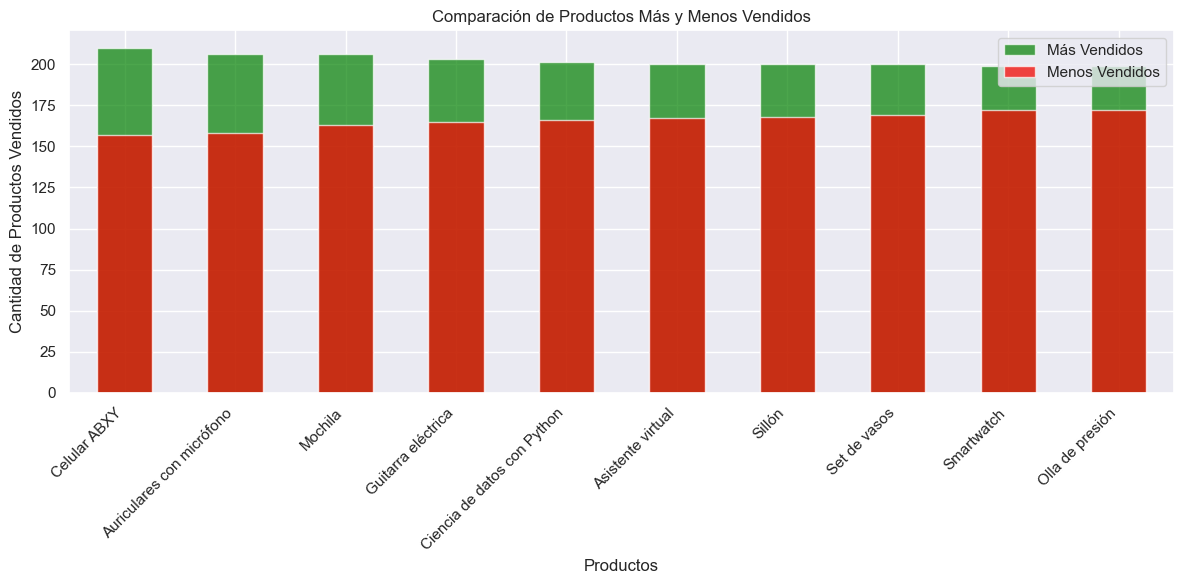

In [43]:
#Comparación de productos más y menos vendidos
plt.figure(figsize=(12, 6))
productos_mas_vendidos.plot(kind='bar', color='green', alpha=0.7, label='Más Vendidos', figsize=(12,6))
productos_menos_vendidos.plot(kind='bar', color='red', alpha=0.7, label='Menos Vendidos', figsize=(12,6))
plt.title("Comparación de Productos Más y Menos Vendidos")
plt.ylabel("Cantidad de Productos Vendidos")
plt.xlabel("Productos")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [44]:
# Costo promedio de envío por tienda
envio_promedio = df.groupby("tienda")["Costo de envío"].mean().sort_values(ascending=False)

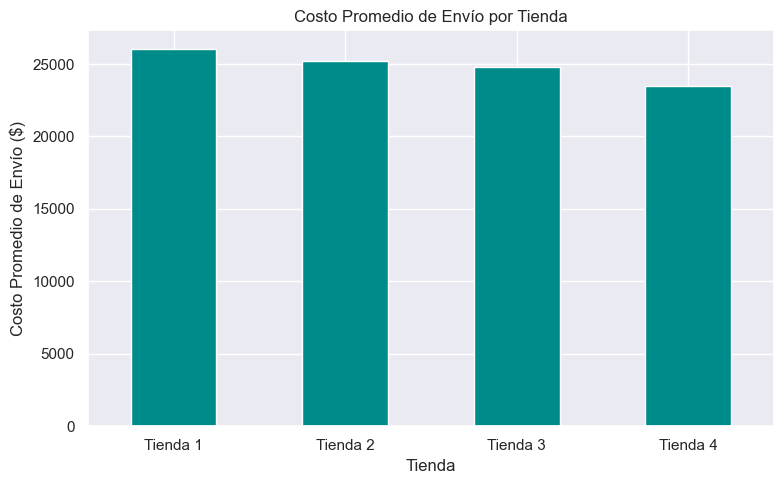

In [45]:
# Gráfica
plt.figure(figsize=(8, 5))
envio_promedio.plot(kind="bar", color="darkcyan")
plt.title("Costo Promedio de Envío por Tienda")
plt.ylabel("Costo Promedio de Envío ($)")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

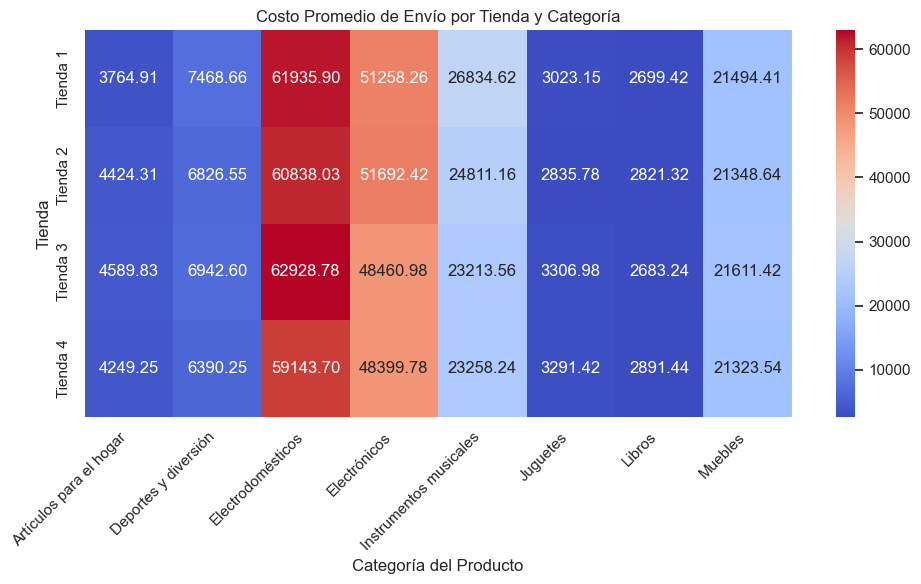

In [46]:
#Grafico de calor por envíos 
plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(index='tienda', columns='Categoría del Producto', values='Costo de envío', aggfunc='mean'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Costo Promedio de Envío por Tienda y Categoría")
plt.ylabel("Tienda")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()